# Imports

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

sns.set_style("whitegrid")

# EDA

## Loading Data

The original dataset has 4 million rows. Using the full dataset for EDA or experimentation is not feasible. So, we will use a sample of 30,000 rows.

In [34]:
sample = pd.read_csv("sample.csv")
print(sample.shape)
sample.head()

(30000, 47)


,type,rowv,colv,u,g,r,i,z,psfMag_u,psfMag_g,...,u_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,ra,dec,b,l
0,0,0.000025,0.000899,21.09567,19.49611,18.65078,18.23999,17.98051,21.06064,19.48528,...,-0.004557,0.166167,0.675803,0.835346,0.999821,0.665882,100.913333,0.156187,-1.660678,211.905236
1,0,-0.008856,-0.003417,24.76185,21.03924,20.14862,19.87783,19.64817,24.66305,21.02927,...,-0.037864,0.334603,0.238365,0.627718,0.134692,0.085135,109.239909,1.273328,6.258424,214.712360
2,0,0.003954,-0.013018,24.75426,22.89556,21.84817,21.38259,20.73028,24.46735,22.90692,...,-0.428419,0.203522,0.090585,0.050960,0.050000,0.064225,94.713043,0.846233,-6.855484,208.440433
3,1,0.006517,0.021139,22.64490,22.19313,21.21620,20.76132,20.89511,23.22920,22.80916,...,-1.144998,0.183922,0.050000,0.782713,0.130607,0.050000,126.388426,0.233304,20.925171,223.943496
4,1,-0.059970,0.006513,21.40245,21.12101,20.58717,20.51851,20.43726,22.48758,22.01874,...,-0.386901,0.200003,0.641636,0.502803,0.405457,0.267841,63.876779,-6.201664,-37.290818,199.186782


## Correlation

We will start by visualizing the correlation between the features and the target variable.

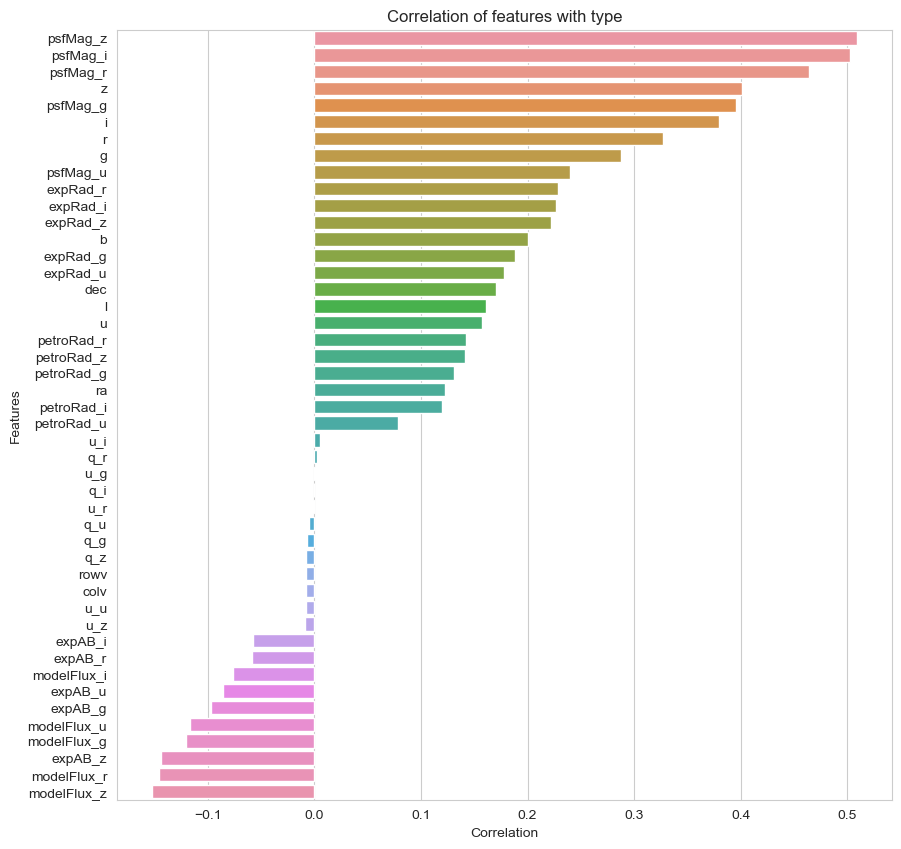

In [35]:
corr = sample.corr()
y = corr["type"].sort_values(ascending=False)
y = y.drop("type")
x = y.index
plt.figure(figsize=(10, 10))
sns.barplot(x=y, y=x)
plt.title("Correlation of features with type")
plt.xlabel("Correlation")
plt.ylabel("Features")
plt.show()

We can see that there are some features that are highly correlated with the target variable while others are not.

There are about 47 columns in the dataset. It is not feasible to do EDA on all the columns. So, we will select the columns that are highly correlated with the target variable.

## Some Columns

In [36]:
x

Index(['psfMag_z', 'psfMag_i', 'psfMag_r', 'z', 'psfMag_g', 'i', 'r', 'g',
       'psfMag_u', 'expRad_r', 'expRad_i', 'expRad_z', 'b', 'expRad_g',
       'expRad_u', 'dec', 'l', 'u', 'petroRad_r', 'petroRad_z', 'petroRad_g',
       'ra', 'petroRad_i', 'petroRad_u', 'u_i', 'q_r', 'u_g', 'q_i', 'u_r',
       'q_u', 'q_g', 'q_z', 'rowv', 'colv', 'u_u', 'u_z', 'expAB_i', 'expAB_r',
       'modelFlux_i', 'expAB_u', 'expAB_g', 'modelFlux_u', 'modelFlux_g',
       'expAB_z', 'modelFlux_r', 'modelFlux_z'],
      dtype='object')

In [37]:
cols_to_eda = [
    "psfMag_z",
    "z",
    "expRad_r",
    "petroRad_r",
    "expAB_i",
]

These are the only columns we will be interested in for EDA. Note that all the columns are numerical and hence we will do mainly a histogram plot and a box or violin plot. (As the target variable is binary.)

In [38]:
def hist_one(ax, col):
    sns.histplot(data=sample, x=col, hue="type", kde=True, ax = ax)
    ax.set_title(f"{col}_Hist")
    ax.set_xlabel("Value")
    ax.set_ylabel("Count")

def box_one(ax, col):
    sns.boxplot(data=sample, x="type", y=col, ax = ax)
    ax.set_title(f"{col}_Box")
    ax.set_xlabel("Type")
    ax.set_ylabel("Value")


def violin_one(ax, col):
    sns.violinplot(data=sample, x="type", y=col, ax = ax)
    ax.set_title(f"{col}_Violin")
    ax.set_xlabel("Type")
    ax.set_ylabel("Value")

In [39]:
def plot_one_col(col):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    hist_one(axes[0], col)
    box_one(axes[1], col)
    violin_one(axes[2], col)
    plt.show()

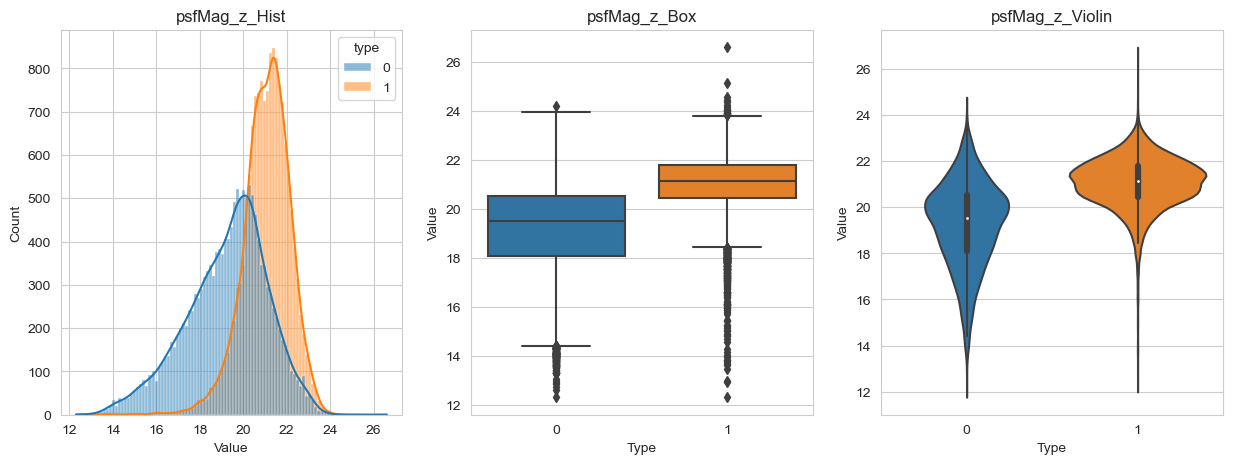

In [40]:
plot_one_col("psfMag_z")

In [41]:
def plot_multiple_columns(columns, kind="hist"):
    fig, axes = plt.subplots(1, len(columns), figsize=(4 * len(columns), 5))
    for i, col in tqdm(enumerate(columns), total=len(columns), desc="Plotting..."):
        if kind == "hist":
            hist_one(axes[i], col)
        elif kind == "box":
            box_one(axes[i], col)
        elif kind == "violin":
            violin_one(axes[i], col)
    plt.show()

Plotting...: 100%|██████████| 4/4 [00:09<00:00,  2.40s/it]


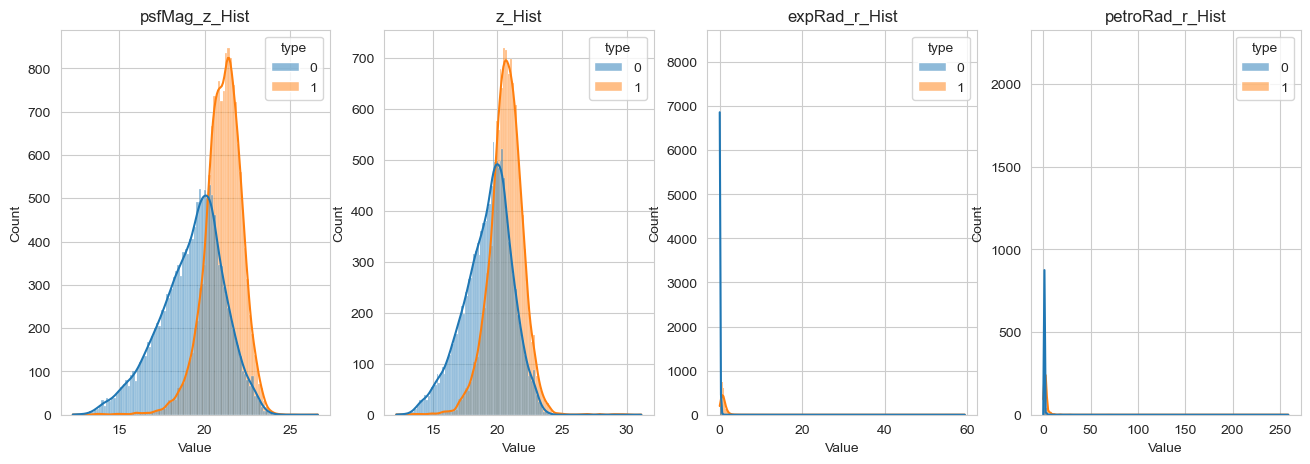

In [42]:
columns = ["psfMag_z", "z", "expRad_r", "petroRad_r"]
plot_multiple_columns(columns, kind="hist")

Plotting...: 100%|██████████| 4/4 [00:00<00:00, 11.88it/s]


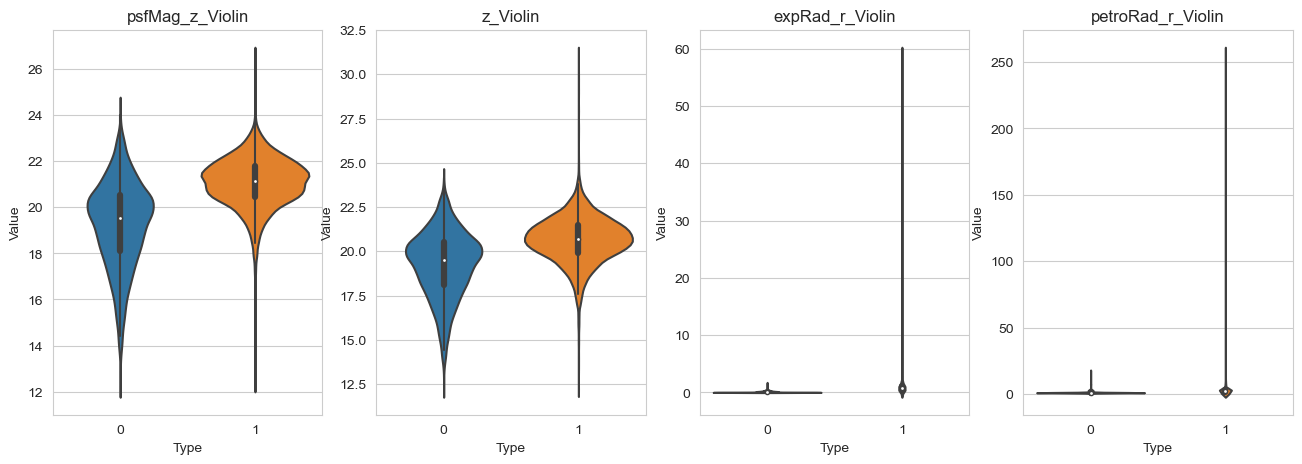

In [43]:
plot_multiple_columns(columns, kind = "violin")

Plotting...: 100%|██████████| 4/4 [00:00<00:00, 59.49it/s]


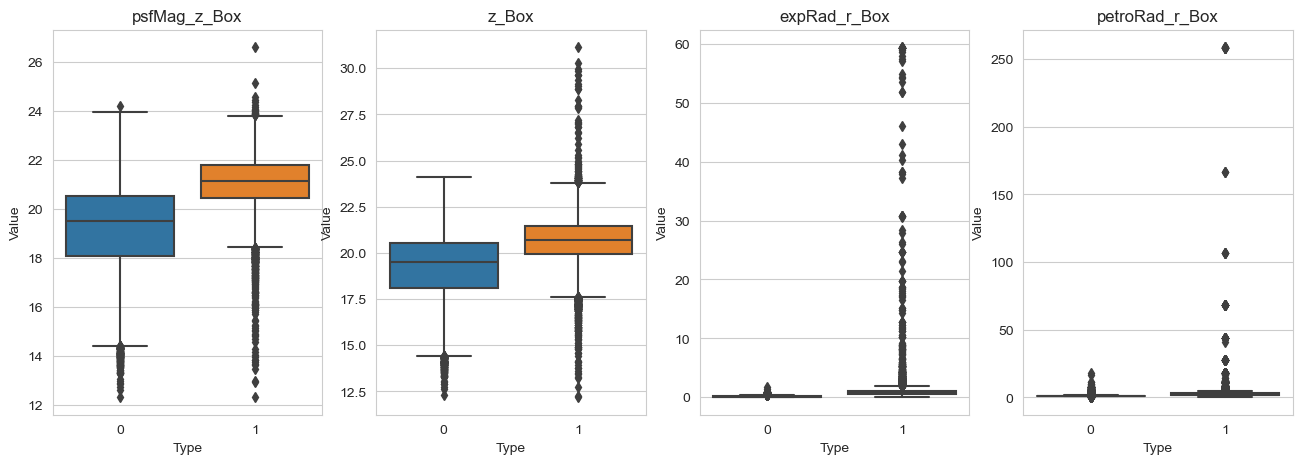

In [44]:
plot_multiple_columns(columns, kind = "box")

Plotting...:   0%|          | 0/5 [00:00<?, ?it/s]

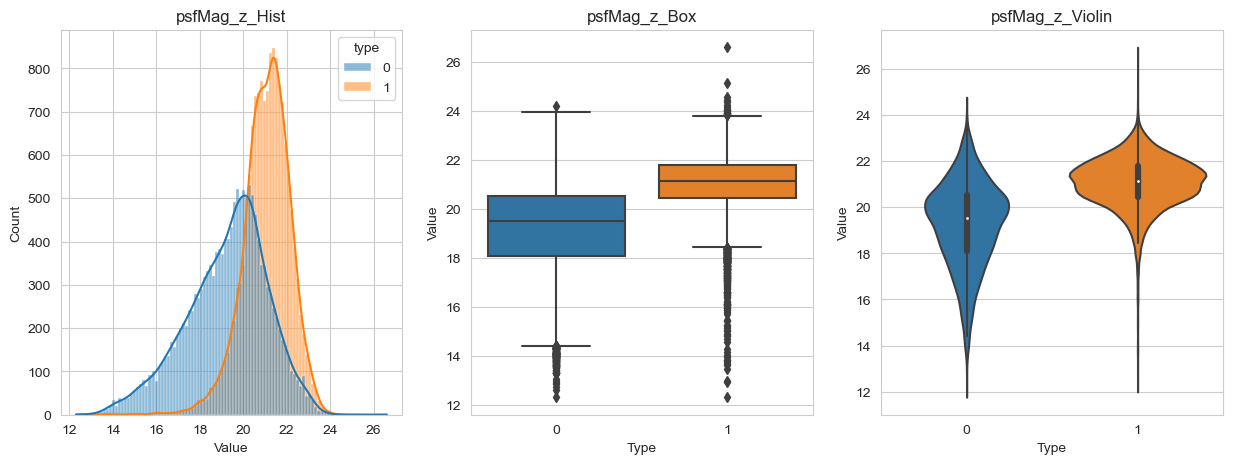

Plotting...:  20%|██        | 1/5 [00:01<00:04,  1.12s/it]

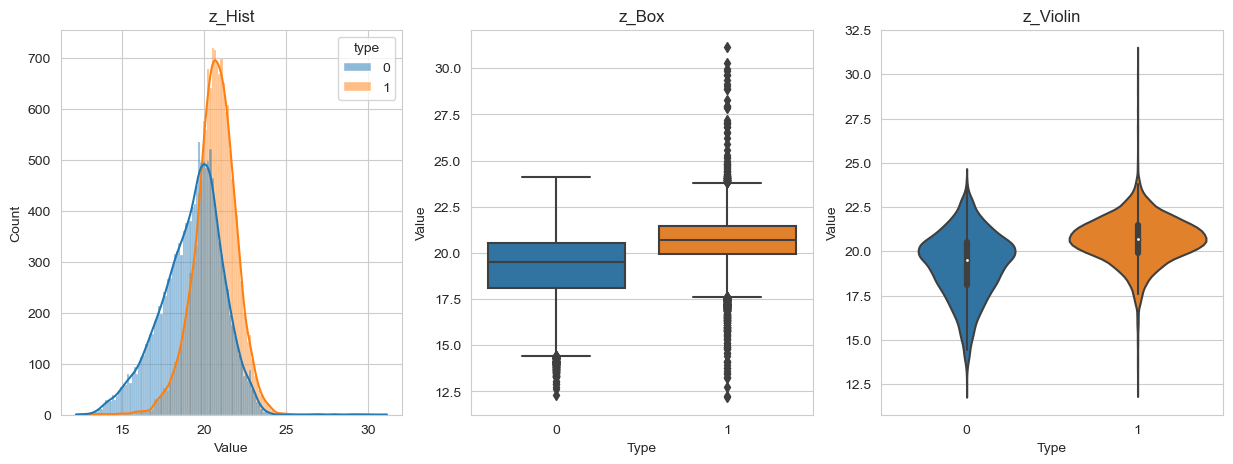

Plotting...:  40%|████      | 2/5 [00:02<00:03,  1.19s/it]

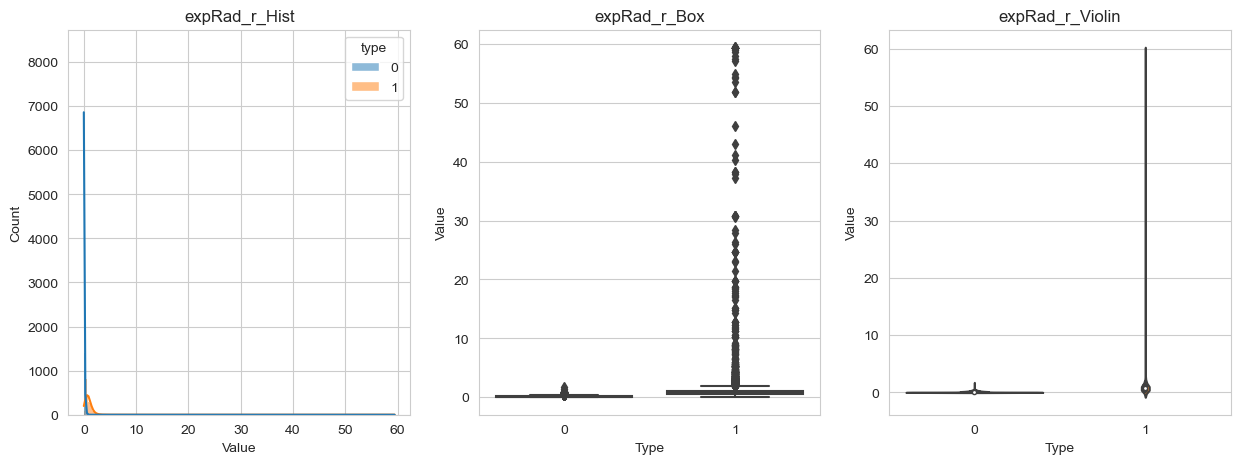

Plotting...:  60%|██████    | 3/5 [00:07<00:06,  3.09s/it]

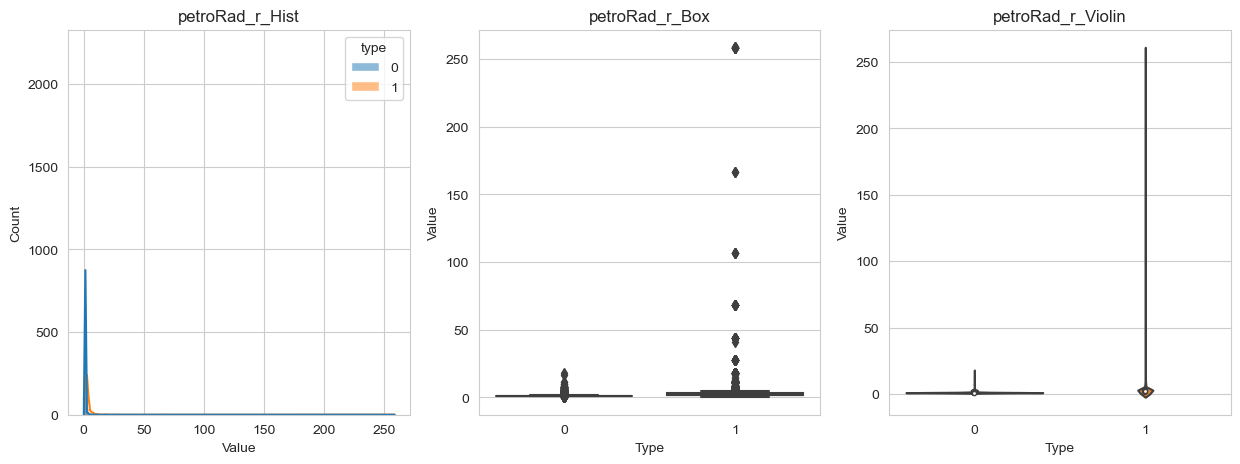

Plotting...:  80%|████████  | 4/5 [00:22<00:07,  7.67s/it]

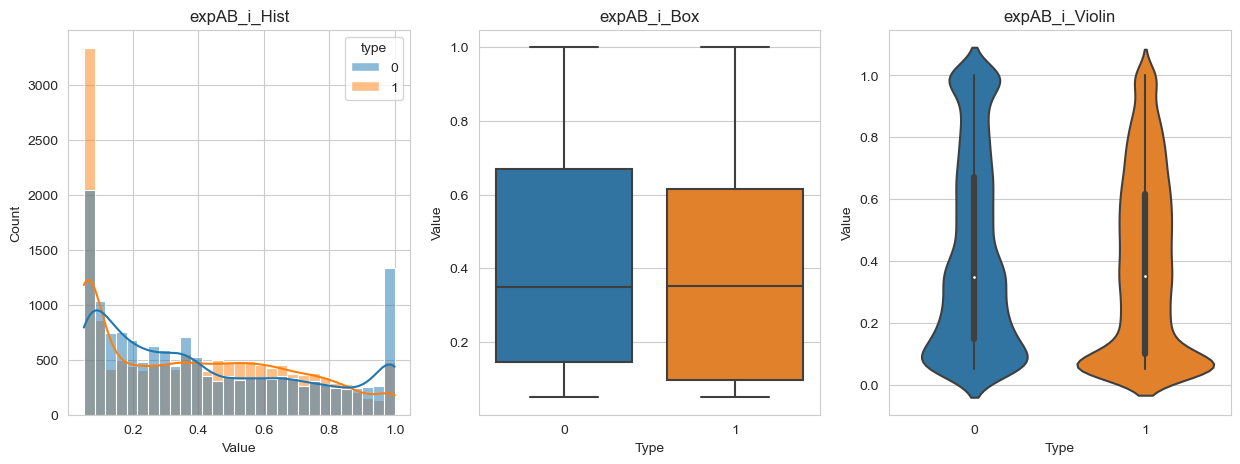

Plotting...: 100%|██████████| 5/5 [00:23<00:00,  4.65s/it]


In [45]:
for col in tqdm(cols_to_eda, desc="Plotting..."):
    plot_one_col(col)

We can see that the some columns of very skewed, like `expRad_r` column while some columns have distribution very near to normal, like `psfMag_z` column. Another result that can be infered from the plots is that there are just a few columns which are *useful*, i.e. the columns which have a significant difference between the two classes. What's more, more than one column are not independent of each other. For example, `psfMag_u` and `psfMag_g` are highly correlated with each other:

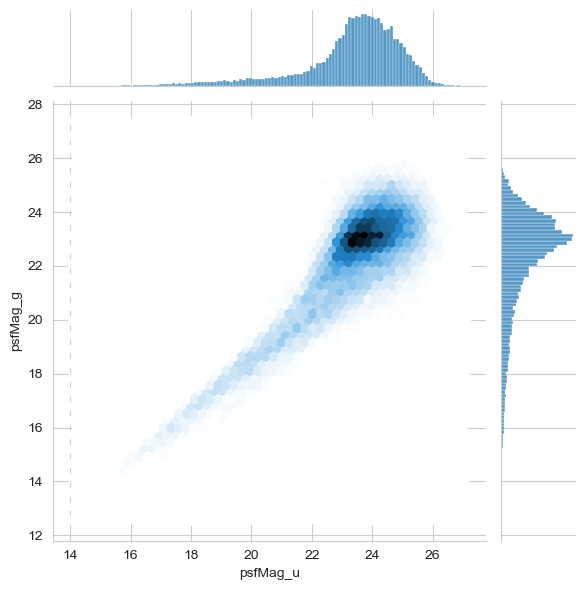

In [46]:
sns.jointplot(data=sample, x="psfMag_u", y="psfMag_g", kind="hex")

In [47]:
np.corrcoef(sample["psfMag_u"], sample["psfMag_g"])

array([[1.        , 0.85437619],
       [0.85437619, 1.        ]])

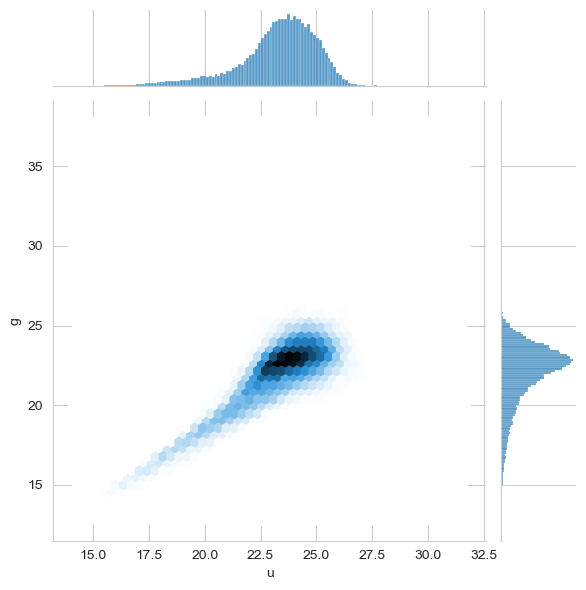

In [48]:
sns.jointplot(data=sample, x="u", y="g", kind="hex")

In [49]:
np.corrcoef(sample["u"], sample["g"])

array([[1.        , 0.82650505],
       [0.82650505, 1.        ]])

This correlation makes sense as the `u` and `g` variant are the same quantity measured over different wavelengths.

## Dimensionality Reduction

### Preprocessing

This section will be about dimensionality reduction. We will use PCA and some other methods to reduce the dimensionality of the dataset. But first, let's have a look at the statistics of the dataset. We might need to do some preprocessing before we can apply PCA.

In [50]:
sample.describe().T

,count,mean,std,min,25%,50%,75%,max
type,30000.0,0.499567,0.500008,0.000000,0.000000,0.000000,1.000000,1.000000
rowv,30000.0,-0.666290,81.640146,-9999.000000,-0.004513,0.000000,0.005017,2.058873
colv,30000.0,-0.666552,81.640141,-9999.000000,-0.004401,0.000000,0.004423,1.693380
u,30000.0,23.265231,1.792249,14.083370,22.467782,23.547030,24.492632,31.723360
g,30000.0,21.983521,1.945960,12.738980,21.090685,22.418815,23.269170,37.849820
r,30000.0,20.774847,1.695363,12.253940,19.982560,21.280075,22.000993,26.013730
i,30000.0,20.280343,1.736084,10.464140,19.422458,20.636815,21.434095,33.113480
z,30000.0,19.953347,1.762898,12.180560,19.011425,20.207830,21.126797,31.142340
psfMag_u,30000.0,23.319155,1.687138,14.075490,22.760132,23.637860,24.411390,27.126950
psfMag_g,30000.0,22.197575,1.952716,12.541320,21.393490,22.734420,23.502635,27.383720


If you look at the values for columns `rowv` and `colv`, you will see that the minimum value in -9999 which is just a placeholder for missing values. We will replace these values with the mean of the column.

In [53]:
sample["rowv"].replace(-9999, np.nan, inplace=True)
sample["rowv"].fillna(sample["rowv"].mean(), inplace=True)
sample["rowv"].isnull().sum()

sample["colv"].replace(-9999, np.nan, inplace=True)
sample["colv"].fillna(sample["colv"].mean(), inplace=True)
sample["colv"].isnull().sum()

0

In [54]:
sample["rowv"].describe()

count    30000.000000
mean         0.000310
std          0.041897
min         -2.139171
25%         -0.004510
50%          0.000000
75%          0.005017
max          2.058873
Name: rowv, dtype: float64

We will also scale the data before applying dimensionality reduction.

### PCA

In [56]:
X = sample.drop("type", axis=1)
y = sample["type"]

n_components = 2

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=2))
])

X_pca = pipe.fit_transform(X)

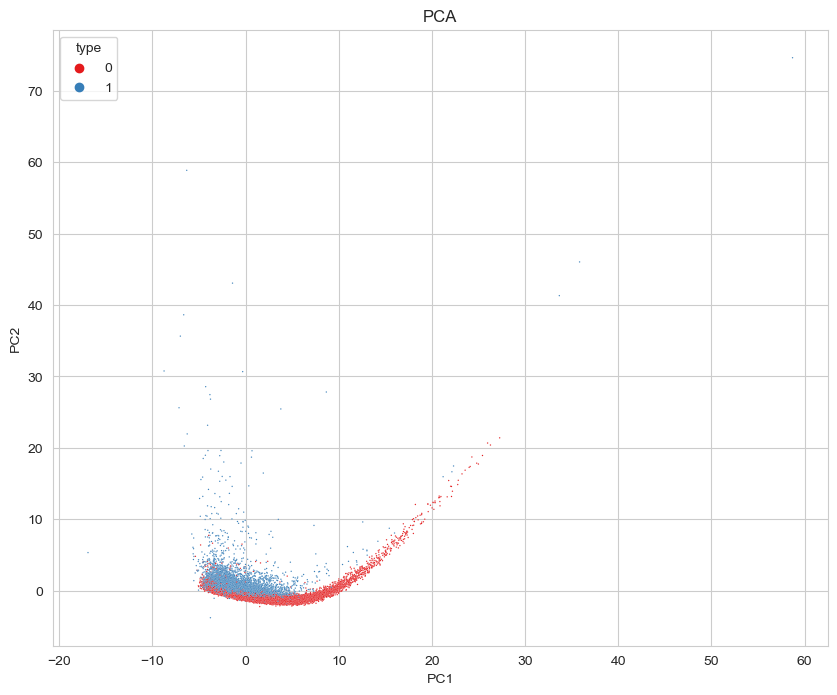

In [57]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette="Set1", s=1)
plt.title("PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

We can definetly see that the PCA plotted above makes data more separable. We can see the two classes, though they are not completely separated. Let's do a 3 dimensional PCA and see if we can get a better result.

In [64]:
n_components = 3

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=3))
])

X_pca = pipe.fit_transform(X)

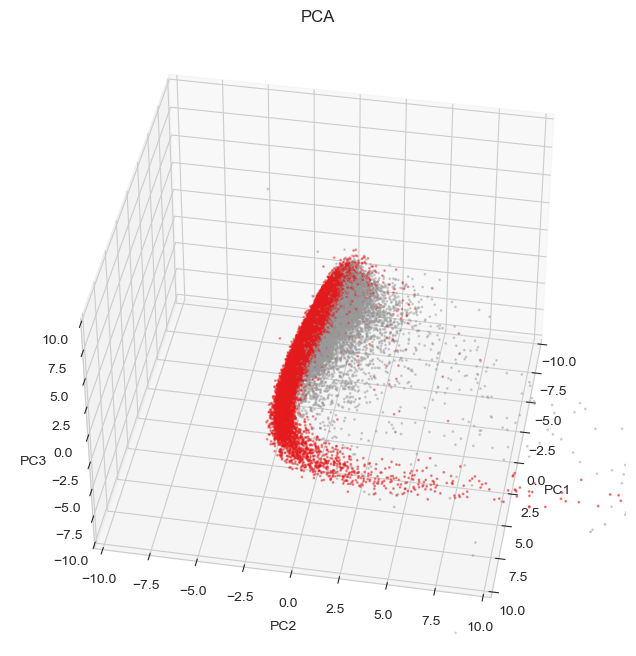

In [78]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y, cmap="Set1", s=1)
ax.set_title("PCA")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")

ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_zlim(-10, 10)
#set the view angle
ax.view_init(40, 10)
plt.show()

We can see that data is more separable in 3 dimensions.

### t-SNE

Next, we will try t-SNE. t-SNE is a non-linear dimensionality reduction technique. It is very useful for visualizing high dimensional data. It is also very useful for visualizing clusters in the data.

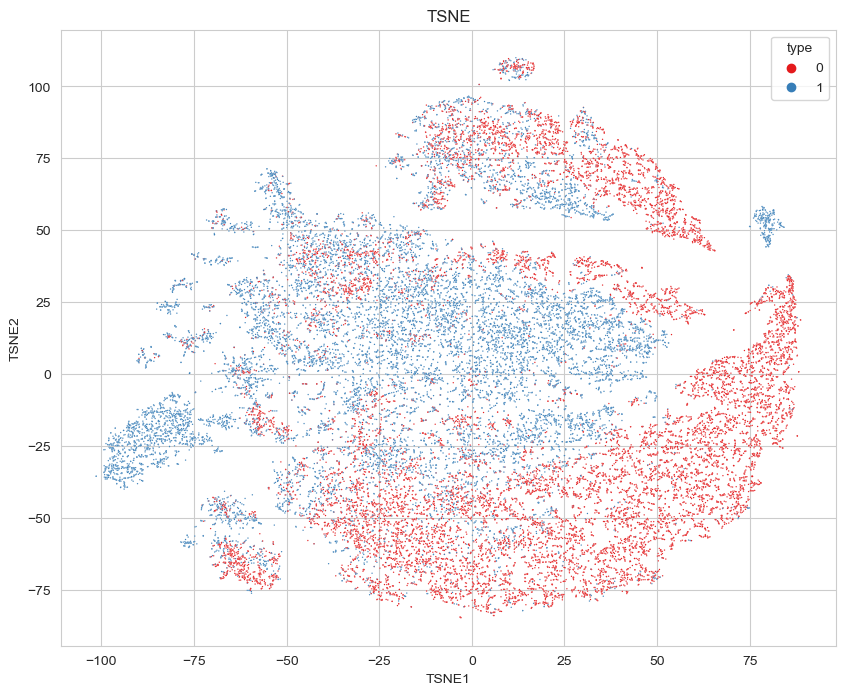

In [82]:
tsne_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("tsne", TSNE(n_components=2))
])
X_tsne = tsne_pipe.fit_transform(X)

plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, palette="Set1", s=1)
plt.title("TSNE")
plt.xlabel("TSNE1")
plt.ylabel("TSNE2")
plt.show()

Dimensionality reduction by PCA and by t-SNE are very different. PCA is a linear dimensionality reduction technique while t-SNE is a non-linear dimensionality reduction technique. We can see that the PCA plot is more linear than the t-SNE plot.

In [83]:
tsne_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("tsne", TSNE(n_components=3))
])
X_tsne = tsne_pipe.fit_transform(X)

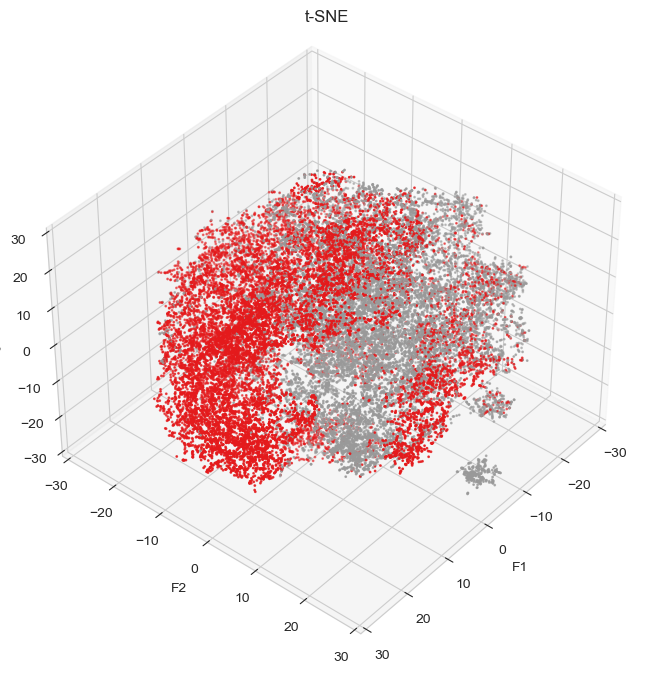

In [88]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], c=y, cmap="Set1", s=1)
ax.set_title("t-SNE")
ax.set_xlabel("F1")
ax.set_ylabel("F2")
ax.set_zlabel("F3")

ax.set_xlim(-30, 30)
ax.set_ylim(-30, 30)
ax.set_zlim(-30, 30)
ax.view_init(40, 40)
plt.show()